In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

import sinter

In [2]:
def get_alpha_vals():
    with open('../EXPERIMENT/alpha_vals.csv','r') as f:
        alpha_vals = pd.read_csv(f,index_col = 0)
    return alpha_vals

def get_experiment_vals():

    with open('../EXPERIMENT/t_y_vals.csv','r') as f:
        data = pd.read_csv(f)

    arr_data = np.array(data)
    data_dict = {}

    for i in data:
        data_val = data[i]
        data_dict[i] = filter(
            lambda x : x == x,
            list(data_val))
    return data_dict

In [3]:
alpha_vals = np.array(get_alpha_vals())
data = get_experiment_vals()

In [4]:
data.keys()

['t4', 't2', 't3', 't0', 't1', 'y1', 'y0', 'y3', 'y2', 'y4']

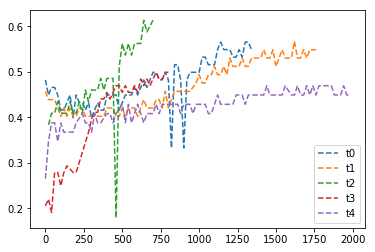

In [5]:
for index,tmp in enumerate([['t0','y0'],['t1','y1'],
                    ['t2','y2'],['t3','y3'],
                    ['t4','y4']]):
    
    t_key,y_key = tmp
    
    plt.plot(data[t_key],data[y_key] / np.sqrt(2) / np.array(alpha_vals)[index],
             '--',label=t_key)
    
plt.legend()

In [6]:
# t3 is the best looker.

alpha_f = alpha_vals[3][0]

t_e = np.array(data['t3'][1:])
y_e = data['y3'][1:] / alpha_f / np.sqrt(2)

In [7]:
# value of t is in seconds
# value of y is distance is in microns (maybe?)

In [8]:
help(sinter.get_trajectory)

Help on function get_trajectory in module sinter:

get_trajectory(mu_to_gamma, alpha_f, t=1.0, delta_t=0)
    takes mu_to_gamma, alpha_f, and t as a kwarg, and returns time varying value of y as a fraction of alpha_f



In [14]:
def cost(mu_to_gamma,alpha_f,t_e,y_e,delta_t):
    y_sim = sinter.get_trajectory(
        mu_to_gamma,alpha_f, t = t_e / 100, delta_t = delta_t)
        
    cost_value = np.sum((y_e - y_sim)**2)
    print mu_to_gamma,cost_value
    
    return cost_value

def cost_function_maker(alpha_f,t_e,y_e):
    return (lambda PARAMS : 
            cost(PARAMS[0],alpha_f,t_e,y_e,PARAMS[1]))

In [15]:
cf = cost_function_maker(alpha_f,t_e,y_e)

In [16]:
minimize(cf, np.array([1.,-2.]))

1.0 10.443429197945846
1.0000000149011612 10.443429133619574
1.0 10.443429179873412
1.0 10.443429197945846
1.9723535662502734 5.959247026886164
1.9723535662502734 5.959247026886164
1.9723535811514346 5.959246973785884
1.9723535662502734 5.959247004391366
3.894165940715985 0.7920924103554925
3.894165940715985 0.7920924103554925
3.8941659556171464 0.7920924002822111
3.894165940715985 0.7920924053107055
4.353729836398443 0.5078683169836313
4.353729836398443 0.5078683169836313
4.3537298512996045 0.5078683119323063
4.353729836398443 0.5078683180037513
4.687707838931194 0.4210896595064024
4.687707838931194 0.4210896595064024
4.6877078538323556 0.42108965628268374
4.687707838931194 0.4210896622726977
5.35706275680638 0.29160364018169227
5.35706275680638 0.29160364018169227
5.357062771707541 0.29160363887329477
5.35706275680638 0.29160364310385417
6.090601960159536 0.19702530027398607
6.090601960159536 0.19702530027398607
6.0906019750606974 0.197025299986186
6.090601960159536 0.197025302809164

      fun: 0.031935676891148866
 hess_inv: array([[ 183.69095481, -125.2566858 ],
       [-125.2566858 ,   94.86348714]])
      jac: array([-2.45496631e-06, -2.79303640e-06])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([10.26440126, -3.44481163])

In [29]:
5.89939651 * 100.

589.939651

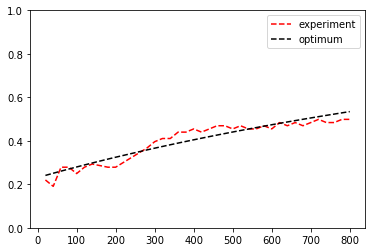

In [17]:
plt.plot(t_e,y_e,'r--',label = 'experiment')
plt.plot(t_e,
            sinter.get_trajectory(
                10.26440126,
                alpha_f, t= t_e / 100.,delta_t = -3.44481163,
            ),
         'k--',label = 'optimum'
        )

plt.ylim(0,1,)
plt.legend()

In [9]:
dir(sinter)

['K',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'get_t',
 'get_trajectory',
 'interp1d',
 'np',
 'pd',
 'plt',
 'quad']

In [10]:
help(sinter.get_trajectory)

Help on function get_trajectory in module sinter:

get_trajectory(mu_to_gamma, alpha_f, t=1.0)
    takes mu_to_gamma, alpha_f, and t as a kwarg, and returns time varying value of y

